# Synthetic Data

Basic use case of `stelaro` that manipulates synthetic data.

In [1]:
import os
from stelaro.data import ncbi, gtdb

DATA_DIRECTORY = "../data/"  # You can modify this directory.
DATASET_DIRECTORY = DATA_DIRECTORY + "genome_small_dataset/"
SUMMARY_DIRECTORY = DATA_DIRECTORY + "ncbi_genome_summaries/"
TAXONOMY_DIRECTORY = DATA_DIRECTORY + "gtdb/"
INDEX_FILE = DATASET_DIRECTORY + "index.tsv"


def mkdir(path: str) -> None:
    """Create a directory if it does not exist."""
    if not os.path.exists(path):
        os.makedirs(path)


mkdir(DATA_DIRECTORY)

## 1. Fetch Reference Genomes

You can download reference genome summaries and use these summaries to create
your own datasets:

In [ ]:
mkdir(SUMMARY_DIRECTORY)
ncbi.install_summaries(SUMMARY_DIRECTORY)

In [ ]:
ncbi.summarize_assemblies(SUMMARY_DIRECTORY)

archaea: 2 316 genomes
bacteria: 388 560 genomes
fungi: 644 genomes
invertebrate: 434 genomes
plant: 186 genomes
protozoa: 121 genomes
vertebrate mammalian: 239 genomes
vertebrate other: 432 genomes
viral: 14 997 genomes

Total: 407 929


## 2. Sample Reference Genomes

You can create an index of genomes that will be use to download reference
genomes. Given that the NCBI contains 407929 reference genomes as of November
2024, you may want to sample a subset of genomes to create a more manageable
genome database during tests.

In [ ]:
mkdir(DATASET_DIRECTORY)
ncbi.sample_genomes(SUMMARY_DIRECTORY, INDEX_FILE, fraction = 0.005)

Let's visualize the index file:

In [6]:
with open(INDEX_FILE, "r") as f:
    count = 0
    print("First 5 lines contained in the index file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First 5 lines contained in the index file:

```
ID	URL	category
GCF_001639295.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/001/639/295/GCF_001639295.1_ASM163929v1/GCF_001639295.1_ASM163929v1_genomic.fna.gz	archaea
GCF_902384065.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/902/384/065/GCF_902384065.1_UHGG_MGYG-HGUT-02162/GCF_902384065.1_UHGG_MGYG-HGUT-02162_genomic.fna.gz	archaea
GCF_002214525.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/002/214/525/GCF_002214525.1_ASM221452v1/GCF_002214525.1_ASM221452v1_genomic.fna.gz	archaea
GCF_003711245.1.fna	https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/003/711/245/GCF_003711245.1_ASM371124v1/GCF_003711245.1_ASM371124v1_genomic.fna.gz	archaea
```

Total number of lines: 1964.


## 3. Install Sampled Reference Genomes

The following cell installs the genomes downloaded at the previous step.

In [7]:
ncbi.install_genomes(INDEX_FILE, DATASET_DIRECTORY)

The genomes listed in the index file should now be installed at ``DATASET_DIRECTORY``. Let's
examine the first file that was downloaded:

In [8]:
with open(INDEX_FILE, "r") as f:
    next(f)
    filename = f.readline().split("\t")[0]

with open(DATASET_DIRECTORY + "/" + filename) as f:
    count = 0
    print("First lines contained in the genome file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First lines contained in the genome file:

```
>NZ_LWMV01000001.1 Methanobrevibacter curvatus strain DSM 11111 MBCUR_contig000001, whole genome shotgun sequence
ATCAGTAGAGTGTGCAGAGGTATATAGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
TTTTTTTTTTTTTATATGTGTATGGTTTTATTCAAGCTTTTCAATAAATTAACAGCAGAATAAGCCGCTAAAACACTTGT
TTTTGGATTTATGTTGGATGGAACATTTTCAGTTTTACTAGTAAAACTTCCAAATTCTCCTTTTACATGGACTTCATGAA
TATTTCTATTTATTTCTGGATCTATAATGATTTTTACATTAATATCCATATTAGAAGCAATACTTAGTGCAGCTGCAACA
```

Total number of lines: 30529.


## 4. Generate a Synthetic Metagenome From Reference Genomes

The following cell extracts subsequences from the downloaded reference genomes to simulate reads
obtained during a metagenomic sequencing experiment.

In [ ]:
from stelaro.data import synthetic_metagenome

SYNTHETIC_FILE = DATA_DIRECTORY + "test_metagenome1.fasta"

synthetic_metagenome(
    INDEX_FILE,
    DATASET_DIRECTORY,
    SYNTHETIC_FILE,
    reads = 3,
    length = 50,
)

with open(SYNTHETIC_FILE, "r") as f:
    for line in f:
        print(line[:-1])  # Ignore the newline character.

>GCF_001998405.1.fna	341684	0
ACGAGCAACGCTGAAGCGAAAATAGGGGGGATCACCCCGCTTAAATTCAA

>GCF_002498065.1.fna	1444400	1
CAAGCATATCGGGATGGGTCGTCGCGGGGAACGGGTCGTCGCTGTTGAAG

>GCF_038731385.1.fna	1390023	2
AGAGAGAAAAAGATAGATAACGTTCACATACCCAGAAAGCCCCTCGATGT



## 5. Install a Reference Taxonomy

A taxonomy describes the phylogenetic links between species.

The GTDB project (https://gtdb.ecogenomic.org/) is a genome taxonomy database that describes a
taxonomy for bacteria and archaea. Install it with the following cell:

In [3]:
gtdb.install_taxonomy(TAXONOMY_DIRECTORY)

Let's inspect the **bacterial** taxonomy:

In [4]:
with open(TAXONOMY_DIRECTORY + "/bac120_taxonomy.tsv") as f:
    count = 0
    print("First lines contained in the GTDB bacterial taxonomy file:\n\n```")
    for line in f:
        if count < 5:
            print(line[:-1])
        count += 1
    print(f"```\n\nTotal number of lines: {count}.")

First lines contained in the GTDB bacterial taxonomy file:

```
RS_GCF_009898805.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_024700115.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_003829795.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
RS_GCF_900480365.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
GB_GCA_003592305.1	d__Bacteria;p__Pseudomonadota;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia;s__Escherichia coli
```

Total number of lines: 715230.


The first column is the identifier of a reference genome. The second column is its taxonomy. Each
field of that column contains a prefix that indicates the taxonomic order:

- `d__`: Domain (bacteria)
- `p__`: Phylum
- `c__`: Class
- `o__`: Order
- `f__`: Family
- `g__`: Genus
- `s__`: Species

There are multiple *Escherichia coli* reference genomes because they correspond to different strains
within the same species.

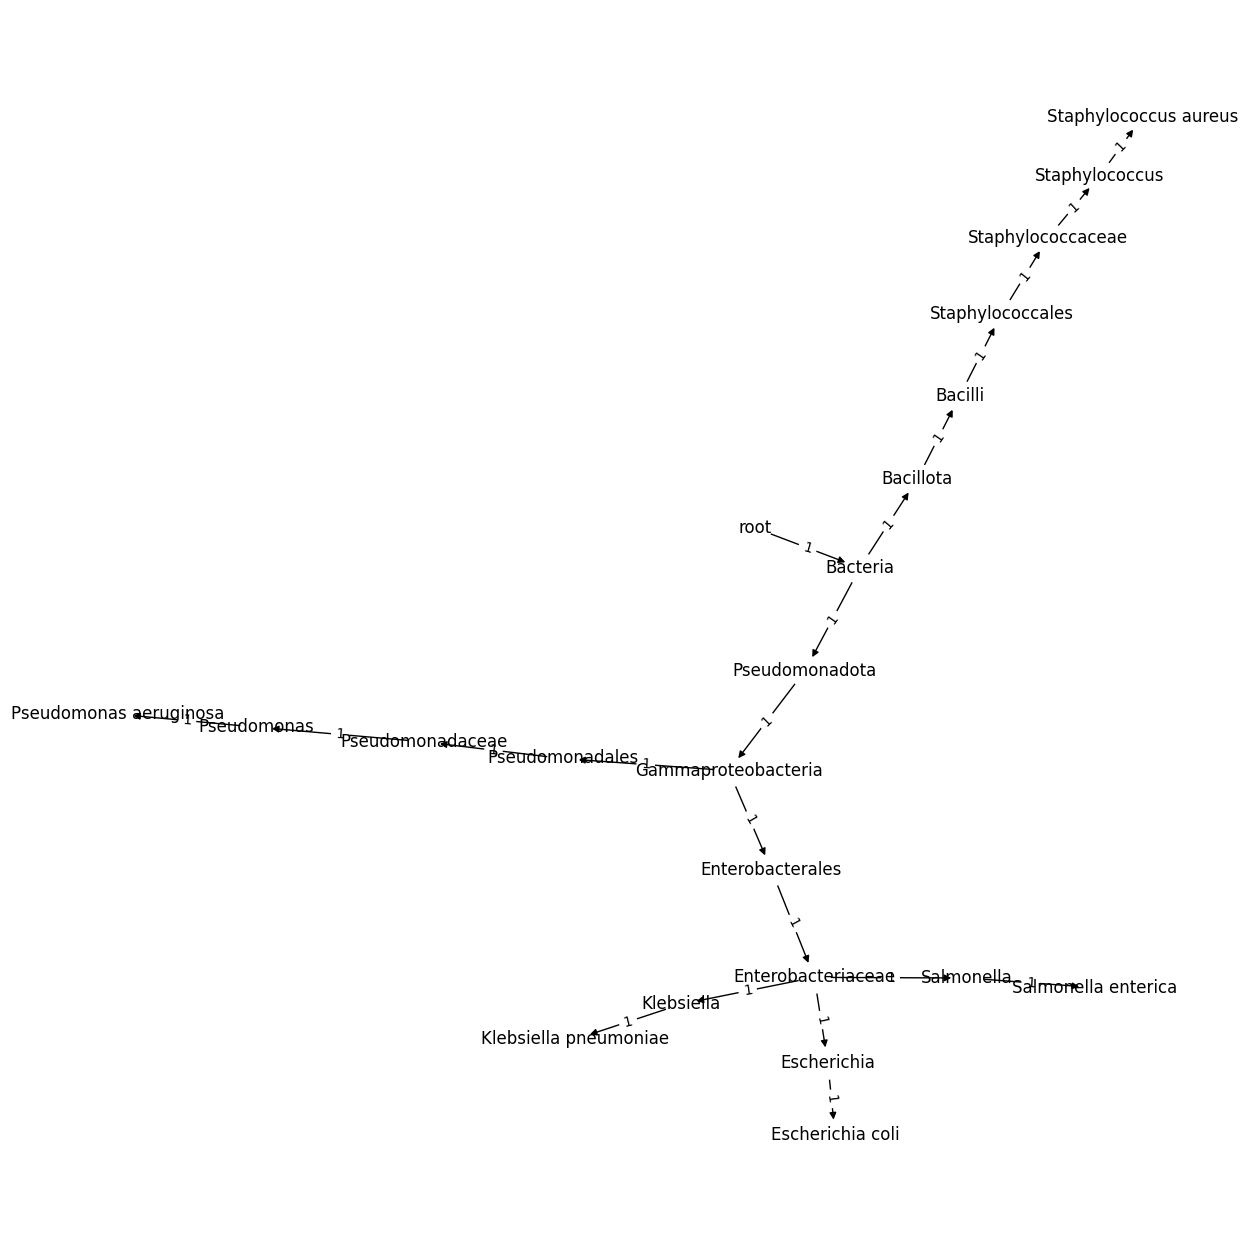

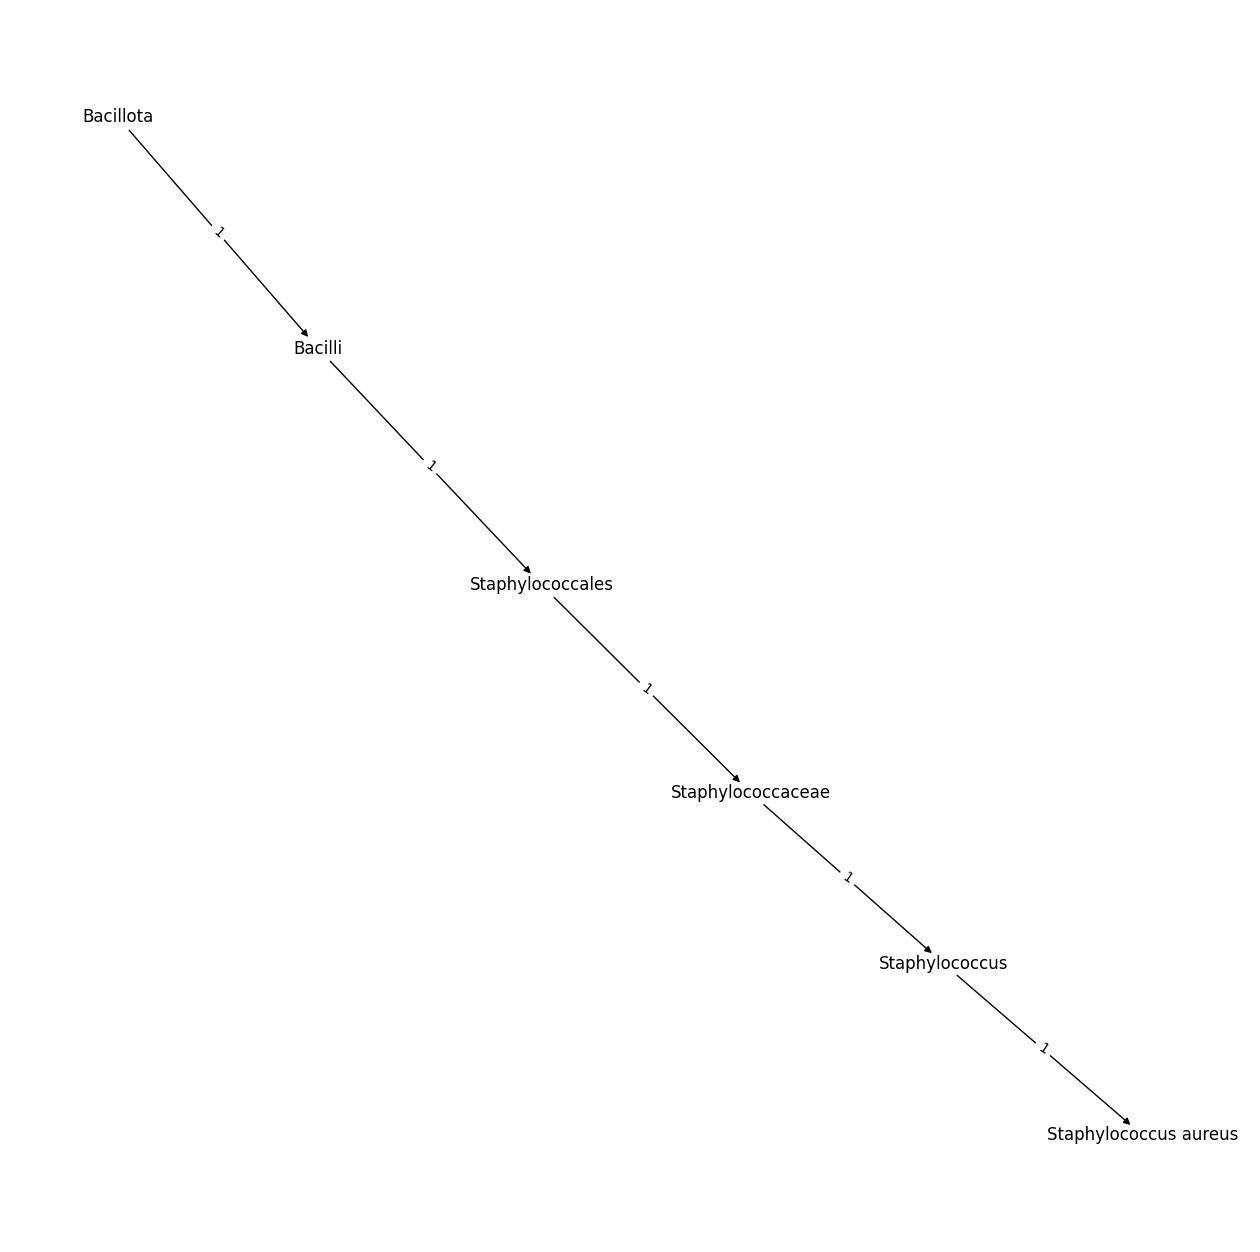

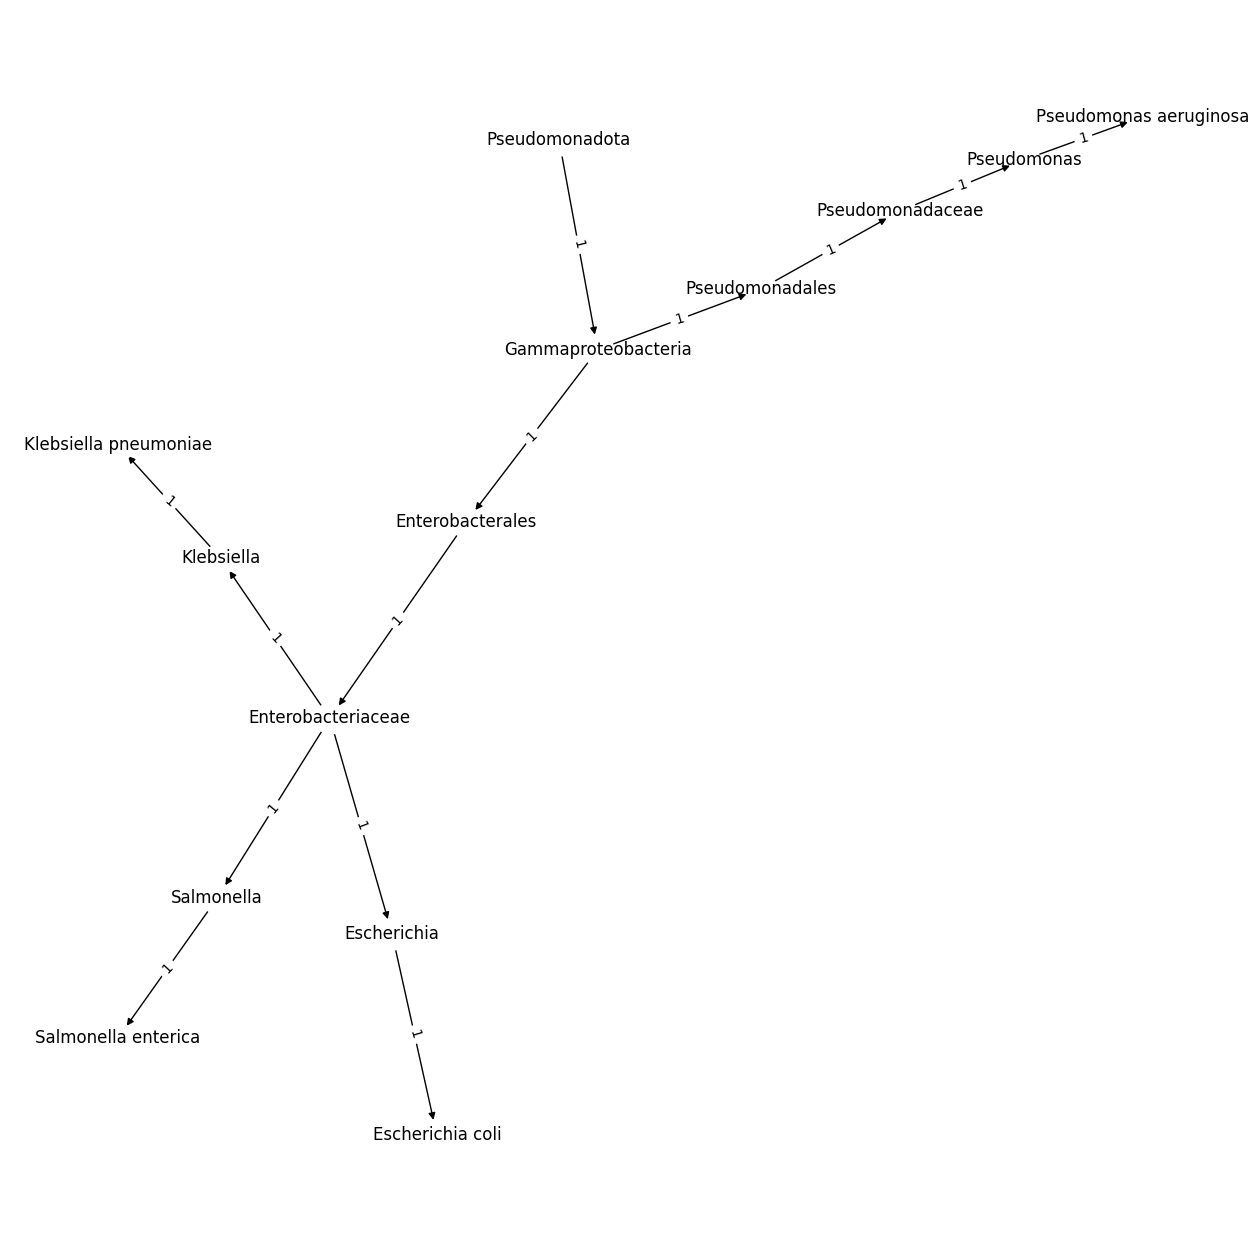

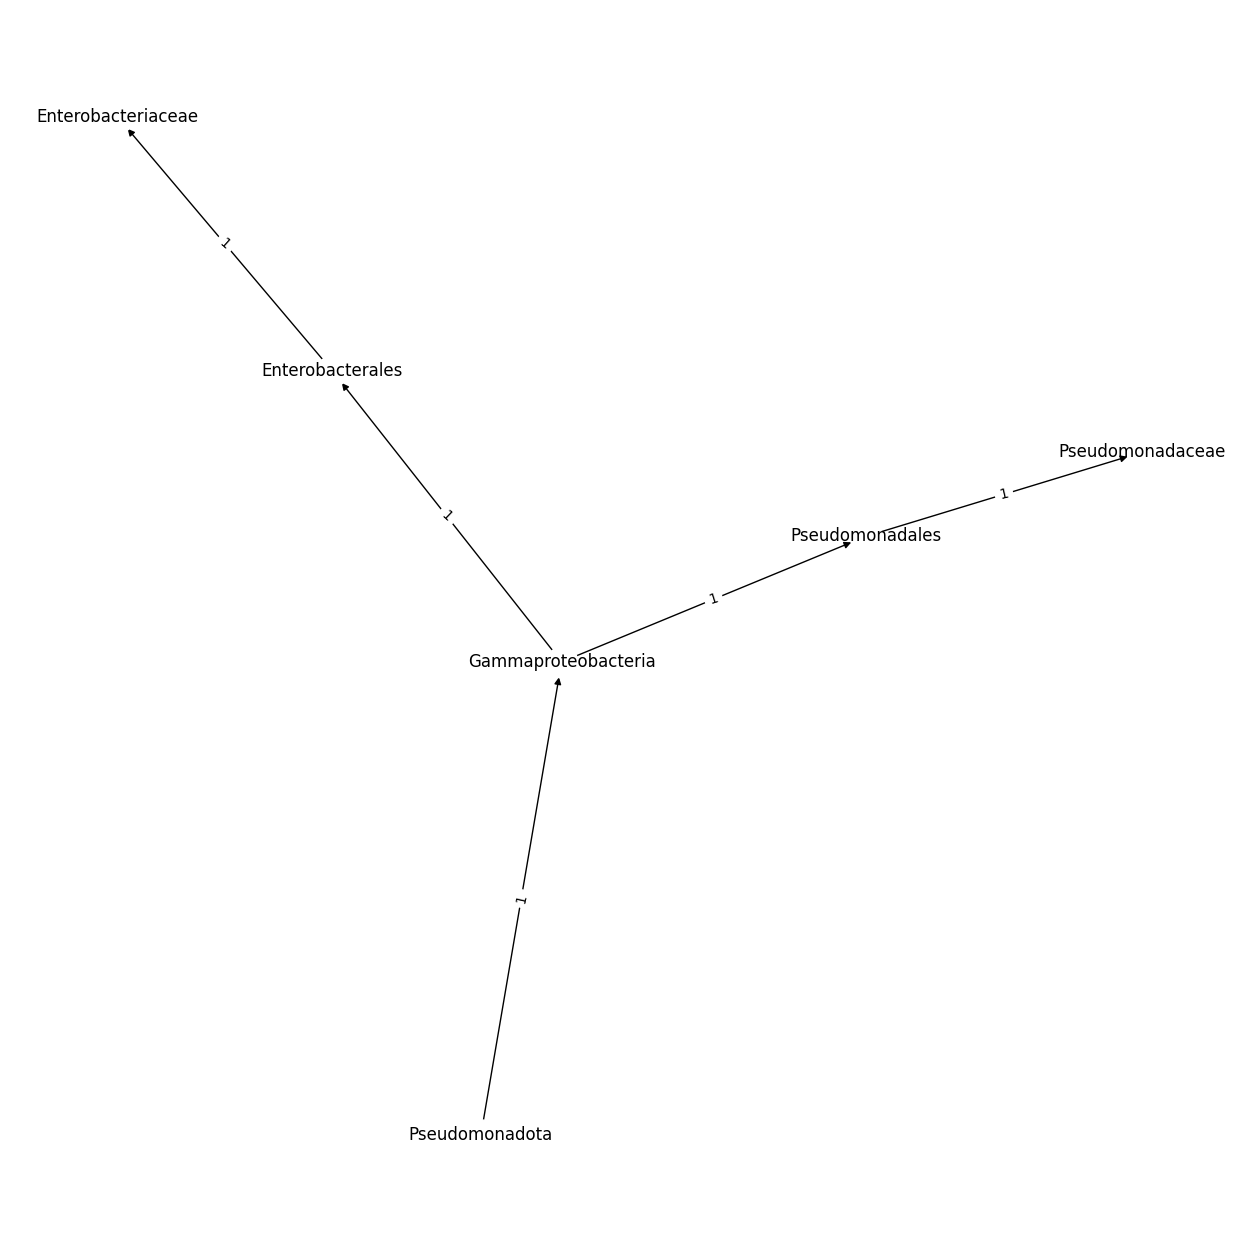

In [14]:
from rustworkx.visualization import mpl_draw
import rustworkx as rx
import matplotlib.pyplot as plt


class Taxonomy():
    """Graph representation of the GTDB taxonomy, with 7 levels. Each node in
    the `graph` corresponds to a taxon. The leaves are species.
    """
    DATABASES = ("refseq", "genbank")
    N_TAXONOMIC_LEVELS = 7

    def __init__(
            self,
            files: list[str],
            databases: tuple[str] = ("refseq", )
        ):
        """Create a GTDB taxonomy manipulation object.

        Args:
            files: List of GTDB taxonomy files.
            databases: Genome reference databases to be used. Supported
                databases: `refseq`, `genbank`.
        """
        self.graph = rx.PyDiGraph()
        self.root = self.graph.add_node("root")
        assert set(databases) <= set(Taxonomy.DATABASES), (
            f"Invalid databases `{databases}`. "
            + f"Valid databases: `{Taxonomy.DATABASES}`.")
        self.databases = databases
        self.genomes = {}
        for database in databases:
            self.genomes[database] = {}

    def _get_line_identifier(self, line: str) -> str:
        identifier = line.split("\t")[0]
        return identifier[len("RS_"):]  # Remove the GTDB-specific prefix.

    def _get_line_taxonomy(self, line: str) -> list[str]:
        line = line.split("\t")[-1]
        fields = line.strip().split(';')
        assert len(fields) == Taxonomy.N_TAXONOMIC_LEVELS, (
            f"Unexpected line: {line}")
        return [f[3:] for f in fields]  # Remove the `d__` prefixes.

    def _add_genome(
            self,
            database: str,
            identifier: str,
            taxonomy: list[str]
        ) -> None:
        index = self.root
        level = 0
        for field in taxonomy:
            edges = self.graph.out_edges(index)
            if edges:
                for edge in edges:
                    _, node_index, _ = edge
                    if self.graph[node_index] == taxonomy[level]:
                        index = node_index
                        break
                else:
                    index = self.graph.add_child(index, field, 1)
            else:
                index = self.graph.add_child(index, field, 1)
            level += 1
        self.genomes[database][identifier] = index

    def read_file(self, path: str) -> None:
        count = 100000
        with open(path, "r") as f:
            for line in f:
                if line.startswith("RS_"):
                    database = "refseq"
                elif line.startswith("GB_"):
                    database = "genbank"
                if database in self.databases:
                    identifier = self._get_line_identifier(line)
                    taxonomy = self._get_line_taxonomy(line)
                    self._add_genome(database, identifier, taxonomy)
                if len(self.genomes["refseq"]) > count:
                    break

    def extract(self, path: list[str], depth: int = float("inf")) -> rx.PyDiGraph:
        index = self.root
        # Find the top-level node.
        for field in path:
            edges = self.graph.out_edges(index)
            if edges:
                for edge in edges:
                    _, node_index, _ = edge
                    if self.graph[node_index] == field:
                        index = node_index
                        break
            else:
                raise RuntimeError(f"Could not find `{path}`.")
        # Extract the subgraph.
        levels = [[index], ]
        while True:
            nodes = []
            for node in levels[-1]:
                edges = self.graph.out_edges(node)
                for edge in edges:
                    _, new_node, _ = edge
                    nodes.append(new_node)
            if not nodes:
                break  # Reached the lowest taxonomic level.
            levels.append(nodes)
            if len(levels) > depth:
                break  # Reached the maximum depth.
        nodes = []
        for level in levels:
            nodes += level
        return self.graph.subgraph(nodes)

    def visualize(self, axis, G = None) -> None:
        if G is None:
            G = self.graph
        mpl_draw(
            G,
            with_labels=True,
            labels=str,
            edge_labels=str,
            node_color=(1.0, 1.0, 1.0),
            node_size=500
        )

T = Taxonomy("x")
T.read_file(TAXONOMY_DIRECTORY + "/bac120_taxonomy.tsv")
figure, axes = plt.subplots()
T.visualize(axes)
figure.set_figwidth(16)
figure.set_figheight(16)
plt.show()

path = ("Bacteria", "Bacillota")
G = T.extract(path)
figure, axes = plt.subplots()
T.visualize(axes, G)
figure.set_figwidth(16)
figure.set_figheight(16)
plt.show()

path = ("Bacteria", "Pseudomonadota")
G = T.extract(path)
figure, axes = plt.subplots()
T.visualize(axes, G)
figure.set_figwidth(16)
figure.set_figheight(16)
plt.show()

path = ("Bacteria", "Pseudomonadota")
G = T.extract(path, 3)
figure, axes = plt.subplots()
T.visualize(axes, G)
figure.set_figwidth(16)
figure.set_figheight(16)
plt.show()

## Train a Neural Network for Classification

This section uses synthetic metagenomes to train a neural network to classify reads as belonging to
viral or bacterial genomes.


### Create the Datasets

In [3]:
DATA_DIRECTORY = "../data/"  # You can modify this directory.
DATASET_DIRECTORY = DATA_DIRECTORY + "classification_dataset/"
BACTERIA_INDEX_FILE = DATASET_DIRECTORY + "bacteria.tsv"
VIRAL_INDEX_FILE = DATASET_DIRECTORY + "viral.tsv"

mkdir(DATASET_DIRECTORY)
ncbi.sample_genomes(SUMMARY_DIRECTORY, BACTERIA_INDEX_FILE, "bacteria", fraction = 0.0001)
ncbi.sample_genomes(SUMMARY_DIRECTORY, VIRAL_INDEX_FILE, "viral", fraction = 0.01)

In [4]:
ncbi.install_genomes(BACTERIA_INDEX_FILE, DATASET_DIRECTORY)
ncbi.install_genomes(VIRAL_INDEX_FILE, DATASET_DIRECTORY)

In [63]:
TRAIN_DATASET = DATASET_DIRECTORY + "train/"
TEST_DATASET = DATASET_DIRECTORY + "test/"
mkdir(TRAIN_DATASET)
mkdir(TEST_DATASET)

In [64]:
from stelaro.data import synthetic_metagenome

N = 10000
L = 300
LD = 100
I = 2
ID = 2

for directory in (TRAIN_DATASET, TEST_DATASET):
    for ORGANISM in ("bacteria", "viral"):
        synthetic_metagenome(
            DATASET_DIRECTORY + ORGANISM + ".tsv",
            DATASET_DIRECTORY,
            directory + ORGANISM + ".fasta",
            reads = N,
            length = L,
            length_deviation = LD,
            indels = I,
            indels_deviation = ID,
        )

### Transform the Data

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, ConcatDataset
import numpy as np
import random

MAX_LEN = 400
BATCH_SIZE = 32
EPOCHS = 30
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- DNA encoding ---
NUCLEOTIDE_TO_ONEHOT = {
    'A': [1, 0, 0, 0],
    'C': [0, 1, 0, 0],
    'G': [0, 0, 1, 0],
    'T': [0, 0, 0, 1],
    'N': [0, 0, 0, 0]
}

def one_hot_encode(seq, max_len=MAX_LEN):
    seq = seq[:max_len].ljust(max_len, 'N')  # pad with 'N' if too short
    return np.array([NUCLEOTIDE_TO_ONEHOT.get(base, [0, 0, 0, 0]) for base in seq])

In [66]:
class DnaDataset(Dataset):
    def __init__(self, fasta_file, label):
        self.samples = []
        with open(fasta_file, "r") as f:
            for line in f:
                if line[0] in list(NUCLEOTIDE_TO_ONEHOT.keys()):
                    encoded = one_hot_encode(line.strip())
                    self.samples.append((encoded, label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        x, y = self.samples[idx]
        return torch.tensor(x, dtype=torch.float32).permute(1, 0), torch.tensor(y, dtype=torch.long)


# --- Load data ---
train_data = ConcatDataset(
    [
        DnaDataset(TRAIN_DATASET + "bacteria.fasta", label=0),
        DnaDataset(TRAIN_DATASET + "viral.fasta", label=1)
    ]
)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_data = ConcatDataset(
    [
        DnaDataset(TEST_DATASET + "bacteria.fasta", label=0),
        DnaDataset(TEST_DATASET + "viral.fasta", label=1)
    ]
)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

In [74]:
# --- Model ---
class DnaCNN(nn.Module):
    def __init__(self):
        super(DnaCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(4, 32, kernel_size=7, padding=3),
            nn.ReLU(),
            #nn.MaxPool1d(2),
            nn.Conv1d(32, 64, kernel_size=5, padding=2),
            nn.ReLU(),
            #nn.MaxPool1d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            #nn.Linear((MAX_LEN // 4) * 64, 128),
            nn.Linear(MAX_LEN * 64, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x):
        x = self.conv(x)
        return self.fc(x)

In [77]:
# --- Evaluation ---
def evaluate_model(model, loader):
    model.eval()
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    with torch.no_grad():
        for x_batch, y_batch in loader:
            x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)
            output = model(x_batch)
            preds = torch.argmax(output, dim=1)
            TP += ((preds == 1) & (y_batch == 1)).sum().item()
            TN += ((preds == 0) & (y_batch == 0)).sum().item()
            FP += ((preds == 1) & (y_batch == 0)).sum().item()
            FN += ((preds == 0) & (y_batch == 1)).sum().item()
    d = 2 * TP + FP + FN
    if d:
        f = 2 * TP / d
    else:
        f = 0
    print(f"TP: {TP}. TN: {TN}. FP: {FP}. FN: {FN}. F1: {f}")
    return f

# --- Training ---
def train_model(model, train_loader, val_loader, criterion, optimizer):
    evaluate_model(model, val_loader)
    x1 = []
    x2 = []
    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(DEVICE), y_batch.to(DEVICE)
            optimizer.zero_grad()
            output = model(x_batch)
            loss = criterion(output, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss:.4f}")
        f = evaluate_model(model, val_loader)
        x1.append(total_loss)
        x2.append(f)
    return x1, x2

In [78]:
# --- Run ---
model = DnaCNN().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses, f1 = train_model(model, train_loader, test_loader, criterion, optimizer)

TP: 3. TN: 9991. FP: 9. FN: 9997. F1: 0.0005992808629644426
Epoch 1/30, Loss: 382.9387
TP: 7704. TN: 8013. FP: 1987. FN: 2296. F1: 0.7824894621908486
Epoch 2/30, Loss: 274.7988
TP: 7956. TN: 8027. FP: 1973. FN: 2044. F1: 0.7984344422700587
Epoch 3/30, Loss: 231.4155
TP: 7404. TN: 8459. FP: 1541. FN: 2596. F1: 0.781631037212985
Epoch 4/30, Loss: 171.9780
TP: 7878. TN: 7642. FP: 2358. FN: 2122. F1: 0.7786123739869539
Epoch 5/30, Loss: 98.9497
TP: 8172. TN: 7088. FP: 2912. FN: 1828. F1: 0.7751849743881616
Epoch 6/30, Loss: 43.6678
TP: 7425. TN: 7789. FP: 2211. FN: 2575. F1: 0.7562640048889794
Epoch 7/30, Loss: 19.0619
TP: 6980. TN: 8143. FP: 1857. FN: 3020. F1: 0.7410946541381324
Epoch 8/30, Loss: 14.4672
TP: 8082. TN: 6654. FP: 3346. FN: 1918. F1: 0.7543401157364197
Epoch 9/30, Loss: 20.5726
TP: 8071. TN: 7032. FP: 2968. FN: 1929. F1: 0.7672417890584153
Epoch 10/30, Loss: 9.2446
TP: 7375. TN: 7810. FP: 2190. FN: 2625. F1: 0.7538972655251726
Epoch 11/30, Loss: 8.2895
TP: 8035. TN: 6908. F

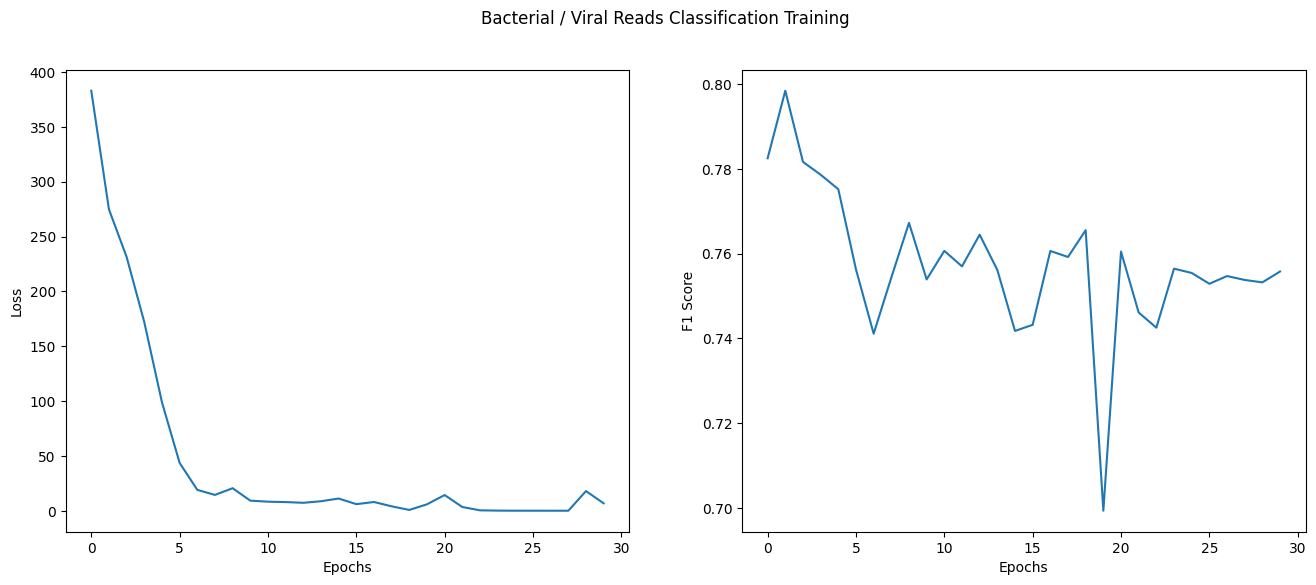

In [84]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
x = list(range(EPOCHS))
ax[0].plot(x, losses, label="losses")
ax[0].set(xlabel='Epochs', ylabel='Loss')
ax[1].plot(x, f1, label="f1")
ax[1].set(xlabel='Epochs', ylabel='F1 Score')
fig.suptitle("Bacterial / Viral Reads Classification Training")
plt.show()

- courbes distinctes pour entrainement et validation
- entrainer jusquà la dégradation / plateau des résultats de validation
- comparer les modèles (CNN / RNN / MLP / ... / RF (méthodes classiques)) et les résultats
- limiter les bases de données  / nombre de citations / facilité d'utilisation du format de données